# Importing Libraries#

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Importing Dataset #


In [2]:
diabetes_dataset = pd.read_csv('diabetes.csv') 

In [3]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabetes_dataset.shape

(768, 9)

In [6]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

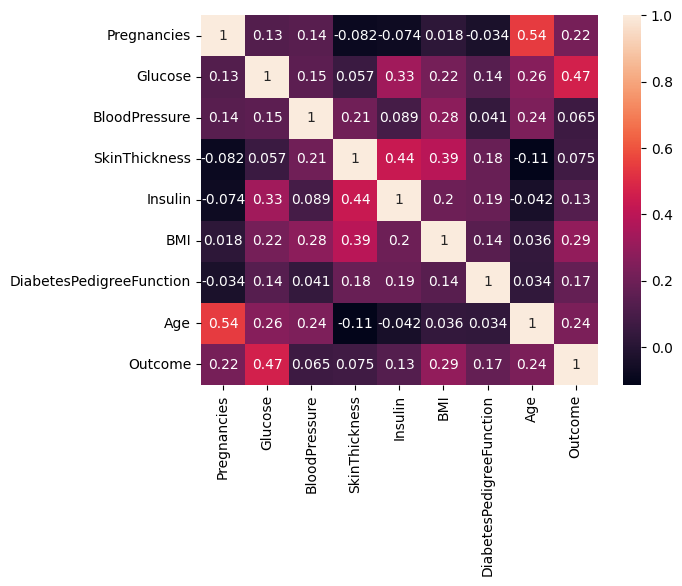

In [8]:
sns.heatmap(diabetes_dataset.corr(),annot=True)
plt.show()

From the heatmap it is seen that there is a high corelation between Outcome and features like Glucose,BMI,Age,BloodPressure,Pregnancies,Insulin.Thus these features can be used to predict the outcome

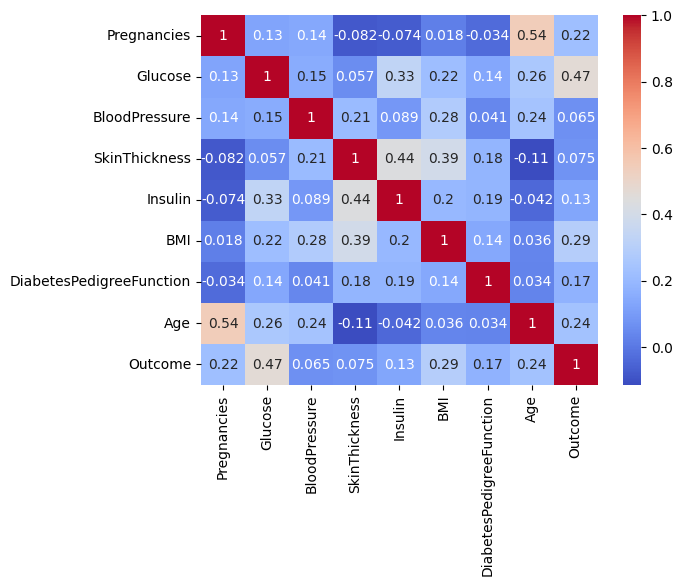

In [9]:
sns.heatmap(diabetes_dataset.corr(),annot=True,cmap="coolwarm")
plt.show()

In [10]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 stands for Non- Diabetic individual

1 stands for Diabetic individual

In [11]:
dataset = diabetes_dataset

There are some missing values in the dataset which would have to be replaced by mean values to give better results

In [12]:
dataset[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = diabetes_dataset[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)

In [13]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [14]:
dataset["Glucose"].fillna(dataset["Glucose"].mean(), inplace = True)
dataset["BloodPressure"].fillna(dataset["BloodPressure"].mean(), inplace = True)
dataset["SkinThickness"].fillna(dataset["SkinThickness"].mean(), inplace = True)
dataset["Insulin"].fillna(dataset["Insulin"].mean(), inplace = True)
dataset["BMI"].fillna(dataset["BMI"].mean(), inplace = True)

In [15]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [16]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the correlation heatmap it is established that there is high correlation between Outcome and Pregnancies,Glucose,BloodPressure,Insulin,BMI,Age

Thus dropping SkinThickness and DiabetesPedigreeFunction columns from the dataset

In [17]:
# separating the data and labels
a = dataset.drop(columns = 'Outcome', axis=1)
b = a.drop(columns = 'DiabetesPedigreeFunction', axis=1)
X = b.drop(columns = 'SkinThickness', axis=1)
Y = diabetes_dataset['Outcome']
print(X)


     Pregnancies  Glucose  BloodPressure     Insulin   BMI  Age
0              6    148.0           72.0  155.548223  33.6   50
1              1     85.0           66.0  155.548223  26.6   31
2              8    183.0           64.0  155.548223  23.3   32
3              1     89.0           66.0   94.000000  28.1   21
4              0    137.0           40.0  168.000000  43.1   33
..           ...      ...            ...         ...   ...  ...
763           10    101.0           76.0  180.000000  32.9   63
764            2    122.0           70.0  155.548223  36.8   27
765            5    121.0           72.0  112.000000  26.2   30
766            1    126.0           60.0  155.548223  30.1   47
767            1     93.0           70.0  155.548223  30.4   23

[768 rows x 6 columns]


In [18]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## Standardizing the data so that values range between 0 and 1 ##

In [19]:
scaler = StandardScaler()

In [20]:
scaler.fit(X)

StandardScaler()

In [21]:
standardized_data = scaler.transform(X)

In [22]:
print(standardized_data)

[[ 6.39947260e-01  8.65108070e-01 -3.35182392e-02 -3.34507888e-16
   1.66291742e-01  1.42599540e+00]
 [-8.44885053e-01 -1.20616153e+00 -5.29859033e-01 -3.34507888e-16
  -8.52531177e-01 -1.90671905e-01]
 [ 1.23388019e+00  2.01581340e+00 -6.95305964e-01 -3.34507888e-16
  -1.33283341e+00 -1.05584152e-01]
 ...
 [ 3.42980797e-01 -2.25789027e-02 -3.35182392e-02 -5.12538638e-01
  -9.10749630e-01 -2.75759658e-01]
 [-8.44885053e-01  1.41807574e-01 -1.02619983e+00 -3.34507888e-16
  -3.43119717e-01  1.17073215e+00]
 [-8.44885053e-01 -9.43143171e-01 -1.98965170e-01 -3.34507888e-16
  -2.99455878e-01 -8.71373930e-01]]


In [23]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [24]:
print(X)
print(Y)

[[ 6.39947260e-01  8.65108070e-01 -3.35182392e-02 -3.34507888e-16
   1.66291742e-01  1.42599540e+00]
 [-8.44885053e-01 -1.20616153e+00 -5.29859033e-01 -3.34507888e-16
  -8.52531177e-01 -1.90671905e-01]
 [ 1.23388019e+00  2.01581340e+00 -6.95305964e-01 -3.34507888e-16
  -1.33283341e+00 -1.05584152e-01]
 ...
 [ 3.42980797e-01 -2.25789027e-02 -3.35182392e-02 -5.12538638e-01
  -9.10749630e-01 -2.75759658e-01]
 [-8.44885053e-01  1.41807574e-01 -1.02619983e+00 -3.34507888e-16
  -3.43119717e-01  1.17073215e+00]
 [-8.44885053e-01 -9.43143171e-01 -1.98965170e-01 -3.34507888e-16
  -2.99455878e-01 -8.71373930e-01]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## Splitting the data for trainning and testing ##

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(768, 6) (614, 6) (154, 6)


# Trainning Models using various algorithms #


## Support Vector Machine ##


In [27]:
classifier = svm.SVC(kernel='linear',random_state = 42)
classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

## Naive Bayes  ##

In [28]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

## Decision Tree Classifier ##

In [29]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

## Logistic Regression ##


In [30]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

## Random Forest Classifier ##

In [31]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

# Making Predictions based on various trained models #


In [32]:
X_test_prediction_svc = classifier.predict(X_test)
X_test_prediction_nb = nb.predict(X_test)
X_test_prediction_dtc = dectree.predict(X_test)
X_test_prediction_lr = logreg.predict(X_test)
X_test_prediction_rfc = ranfor.predict(X_test)

## Calculating the accuracy of the predictions ##

In [33]:
accuracy_svc = accuracy_score(X_test_prediction_svc, Y_test)
accuracy_nb = accuracy_score(X_test_prediction_nb, Y_test)
accuracy_dtc = accuracy_score(X_test_prediction_dtc, Y_test)
accuracy_lr = accuracy_score(X_test_prediction_lr, Y_test)
accuracy_rfc = accuracy_score(X_test_prediction_rfc, Y_test)

In [34]:
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dtc * 100))
print("Random Forest: " + str(accuracy_rfc * 100))

Support Vector Classifier: 75.97402597402598
Naive Bayes: 75.32467532467533
Decision tree: 72.72727272727273
Random Forest: 74.02597402597402


## SVC gives the best accuracy ##

## Making a input system ##

In [35]:
input_data = (1,106,76,0,37.5,26)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[-0.84488505 -0.51573833  0.29737562 -1.83071704  0.73392165 -0.61611067]]
[0]
The person is not diabetic


c:\Users\Rohit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
